<a href="https://colab.research.google.com/github/mrcruz117/SARIMAX---Parameter-Tuning-Template/blob/main/SARIMAX_Forecast_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and Data

In [1]:
!pip install pmdarima

In [2]:
%cd /content/drive/MyDrive/Time\ Series\ Forecasting\ Product

/content/drive/MyDrive/Time Series Forecasting Product


In [3]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm

In [4]:
# pmdarima dep fix
# 1. Blow away any existing installs
# !pip uninstall -y numpy

# 2. Install the NumPy version known to work (1.23.x series has ABI size 96)
# !pip install "numpy<2"

In [5]:
#load the data
#YYYY-MM-DD
df = pd.read_csv('nyc_data.csv', index_col = 0, parse_dates = True)
future_df = pd.read_csv('future.csv', index_col = 0, parse_dates = True)
future_df.head()

,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2021-01-01,NaN,0,0,0,5.00,154.221
2021-01-02,NaN,0,0,0,11.11,264.805
2021-01-03,NaN,0,0,0,3.89,115.499
2021-01-04,NaN,0,0,0,6.67,124.650
2021-01-05,NaN,0,0,0,5.56,77.968


In [6]:
#Rename variable
df = df.rename(columns = {'Demand': 'y'})
df.head(0)

,y,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,


In [7]:
# Extract Regressors
train_X = df.iloc[:,1:]
future_X = future_df.iloc[:,1:]

future_X.head(0)

,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,


# SARIMAX Model

In [28]:
# best params
parameters = pd.read_csv('Forecasting Product/best_params_sarimax.csv', index_col=0)

In [13]:
# store params
p = parameters.loc['p'][0]
d = parameters.loc['d'][0]
q = parameters.loc['q'][0]
P = parameters.loc['P'][0]
D = parameters.loc['D'][0]
Q = parameters.loc['Q'][0]

/tmp/ipython-input-13-326249675.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = parameters.loc['p'][0]
/tmp/ipython-input-13-326249675.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d = parameters.loc['d'][0]
/tmp/ipython-input-13-326249675.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  q = parameters.loc['q'][0]
/tmp/ipython-input-13-326249675.py:5: FutureWarning: Series.__getitem__ treating keys as positions is d

In [15]:
# model

model = pm.ARIMA(
    X=train_X,
    order=(p,d,q),
    seasonal_order=(P,D,Q, 7),
    suppress_warnings=True,
    enforce_stationarity=False,
    )

# fit model
model.fit(df.y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


ARIMA(order=(1.0, 1.0, 1.0), seasonal_order=(1.0, 1.0, 1.0, 7),
      suppress_warnings=True)

## Forecasting

In [21]:
# predictions

predictions_sarimax = pd.Series(model.predict(
    n_periods=len(future_X),
    X=future_X
    )).rename('sarimax')

predictions_sarimax.index = future_df.index
predictions_sarimax

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['X']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,sarimax
Date,
2021-01-01,740.020414
2021-01-02,855.655600
2021-01-03,768.447003
2021-01-04,906.675377
2021-01-05,779.166487
2021-01-06,927.823520
2021-01-07,822.342855
2021-01-08,738.463447
2021-01-09,853.614069


# Visualization

<Axes: title={'center': 'Demand'}, xlabel='Date'>

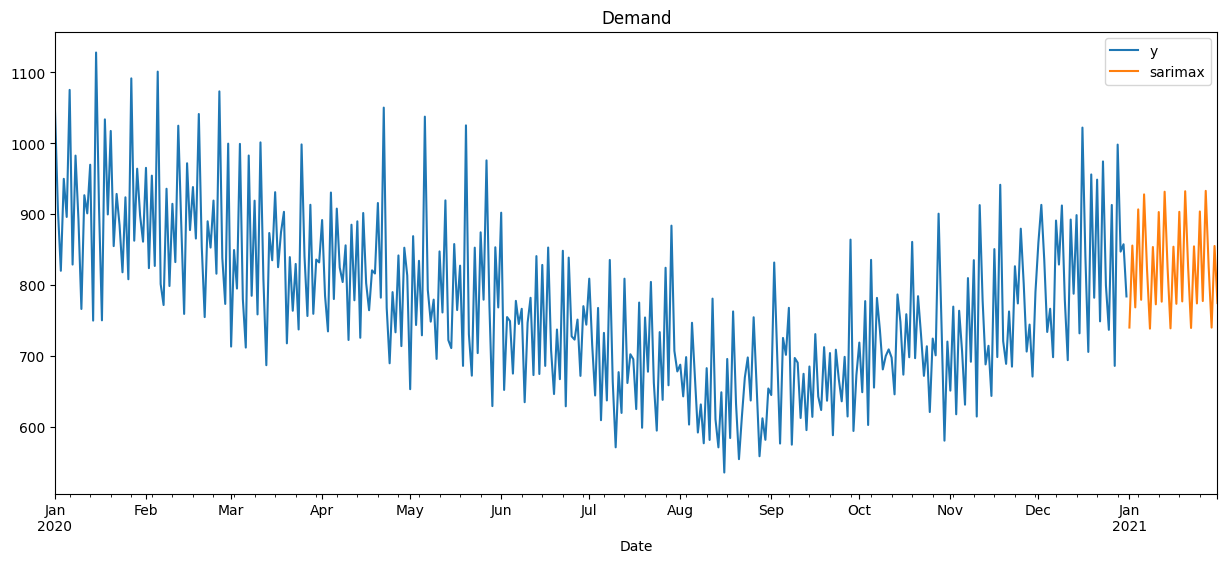

In [26]:
df['y']['2020-01-01':].plot(figsize=(15,6), title='Demand', legend=True)
predictions_sarimax.plot(legend=True)

In [29]:
# exporting
predictions_sarimax.to_csv('Forecasting Product/Ensemble/predictions_sarimax.csv')